In [ ]:

!pip install -q kaggle


from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"haticenuryalman","key":"25ead1dd7c8569ff882bf8b55b05c658"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:

!kaggle datasets download -d nirmalsankalana/rice-leaf-disease-image


!unzip rice-leaf-disease-image.zip -d rice_leaf_data


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_141.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_142.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_143.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_144.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_145.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_146.JPG  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_147.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_148.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_149.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_150.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_151.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_152.jpg  
  inflating: rice_leaf_data/Bacterialblight/BACTERIALBLIGHT1_153.jpg  
  inflating: rice_leaf_data/Ba

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!ls rice_leaf_data


Bacterialblight  Blast	Brownspot  Tungro


In [ ]:
data_dir = "rice_leaf_data"


In [ ]:
classes = os.listdir(data_dir)
print("Sınıflar:", classes)


Sınıflar: ['Blast', 'Bacterialblight', 'Tungro', 'Brownspot']


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Eğitim için augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Eğitim veri akışı
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Doğrulama veri akışı
val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 4747 images belonging to 4 classes.
Found 1185 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Üst katmanlar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('xception_best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)

history_xception = history



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7529 - loss: 0.6126

149/149 ━━━━━━━━━━━━━━━━━━━━ 106s 610ms/step - accuracy: 0.7535 - loss: 0.6113 - val_accuracy: 0.9308 - val_loss: 0.1926
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.9071 - loss: 0.2563

149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 522ms/step - accuracy: 0.9071 - loss: 0.2562 - val_accuracy: 0.9561 - val_loss: 0.1434
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9437 - loss: 0.1738

149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 535ms/step - accuracy: 0.9437 - loss: 0.1739 - val_accuracy: 0.9553 - val_loss: 0.1110
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9317 - loss: 0.1714

149/149 ━━━━━━━━━━━━━━━━━━━━ 79s 530ms/step - accuracy: 0.9317 - loss: 0.1714 - val_accuracy: 0.9755 - val_loss: 0.0804
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 523ms/step - accuracy: 0.9441 - loss: 0.1481 - val_accuracy: 0.9713 - val_loss: 0.0843
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.9579 - loss: 0.1194

149/149 ━━━━━━━━━━━━━━━━━━━━ 77s 514ms/step - accuracy: 0.9579 - loss: 0.1194 - val_accuracy: 0.9806 - val_loss: 0.0715
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9568 - loss: 0.1161

149/149 ━━━━━━━━━━━━━━━━━━━━ 77s 519ms/step - accuracy: 0.9568 - loss: 0.1161 - val_accuracy: 0.9840 - val_loss: 0.0599
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9631 - loss: 0.0938

149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 511ms/step - accuracy: 0.9631 - loss: 0.0939 - val_accuracy: 0.9840 - val_loss: 0.0552
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.9662 - loss: 0.0916

149/149 ━━━━━━━━━━━━━━━━━━━━ 76s 513ms/step - accuracy: 0.9662 - loss: 0.0916 - val_accuracy: 0.9882 - val_loss: 0.0401
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 75s 501ms/step - accuracy: 0.9691 - loss: 0.0877 - val_accuracy: 0.9781 - val_loss: 0.0588


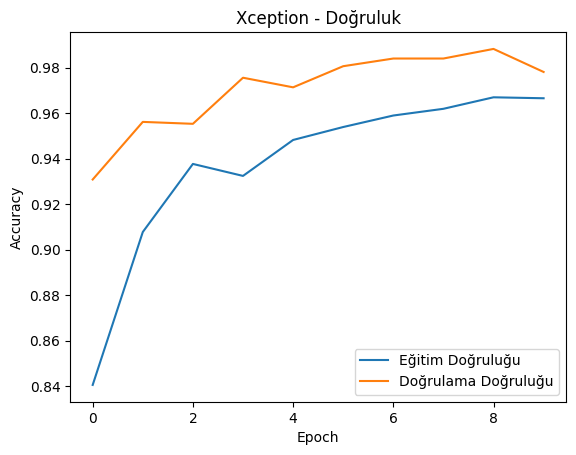

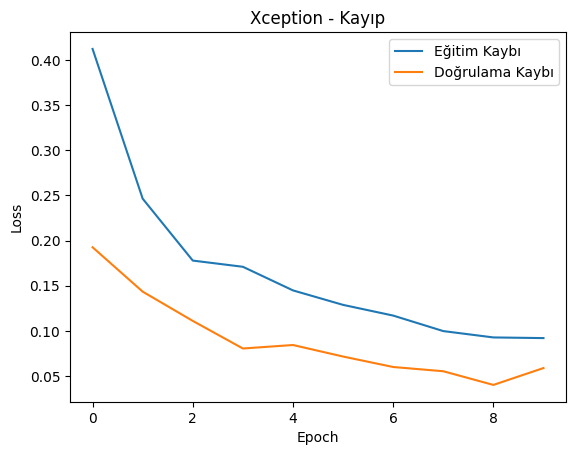

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Xception - Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Kayıp
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Xception - Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


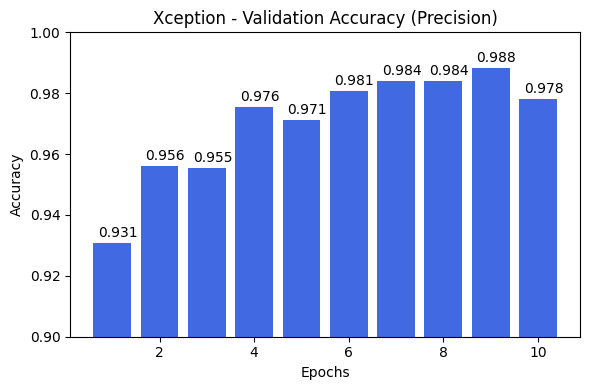

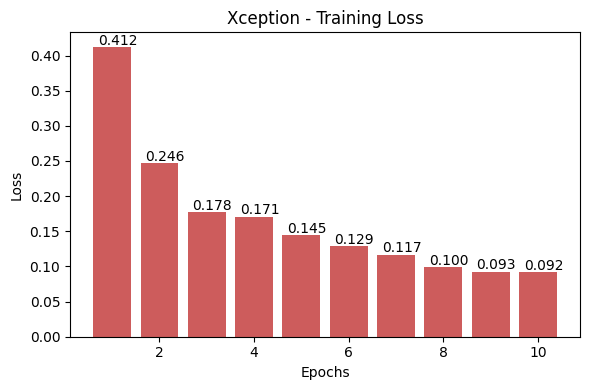

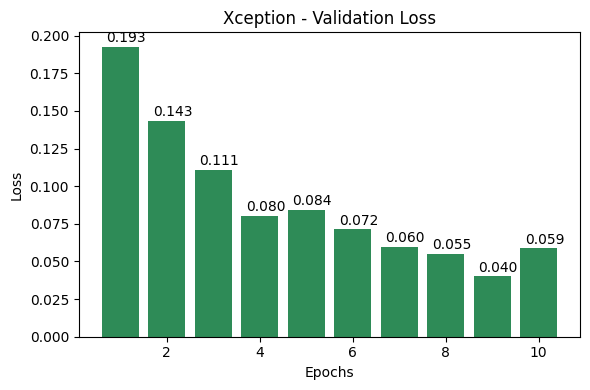

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Validation Accuracy (Precision)
plt.figure(figsize=(6,4))
plt.bar(epochs, val_accuracy, color='royalblue')
plt.title('Xception - Validation Accuracy (Precision)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
for i, v in enumerate(val_accuracy):
    plt.text(epochs[i]-0.3, v+0.002, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Training Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, train_loss, color='indianred')
plt.title('Xception - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(train_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Validation Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, val_loss, color='seagreen')
plt.title('Xception - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(val_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


val_generator.reset()
pred_probs = model.predict(val_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_generator.classes


labels = list(val_generator.class_indices.keys())

# Sınıflandırma raporu
report = classification_report(y_true, y_pred, target_names=labels)
print(report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 396ms/step
                 precision    recall  f1-score   support

Bacterialblight       0.98      0.99      0.98       316
          Blast       0.98      0.94      0.96       288
      Brownspot       0.96      0.98      0.97       320
         Tungro       1.00      1.00      1.00       261

       accuracy                           0.98      1185
      macro avg       0.98      0.98      0.98      1185
   weighted avg       0.98      0.98      0.98      1185



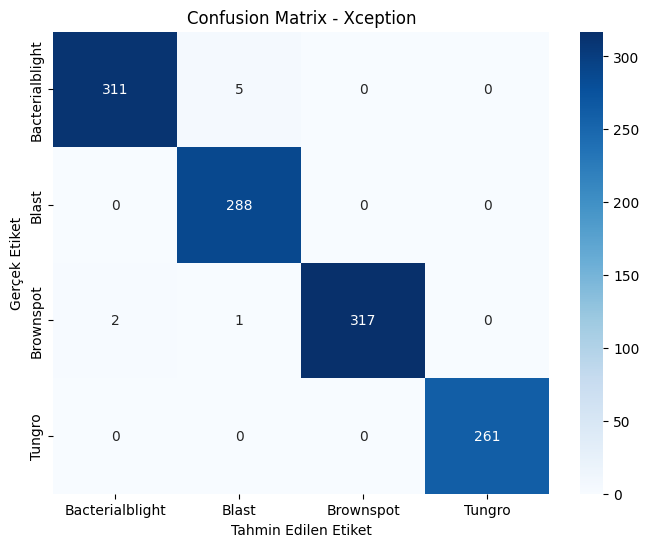

In [ ]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Xception')
plt.ylabel('Gerçek Etiket')
plt.xlabel('Tahmin Edilen Etiket')
plt.show()


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam



In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Üst katmanlar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


In [ ]:

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('vgg16_best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)
history_vgg = history


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7050 - loss: 0.7496

149/149 ━━━━━━━━━━━━━━━━━━━━ 90s 607ms/step - accuracy: 0.7050 - loss: 0.7496 - val_accuracy: 0.7848 - val_loss: 0.6470
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7007 - loss: 0.7380

149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 545ms/step - accuracy: 0.7007 - loss: 0.7379 - val_accuracy: 0.7797 - val_loss: 0.6188
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7281 - loss: 0.6987

149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 536ms/step - accuracy: 0.7281 - loss: 0.6987 - val_accuracy: 0.7738 - val_loss: 0.6139
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7351 - loss: 0.6949

149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 567ms/step - accuracy: 0.7351 - loss: 0.6949 - val_accuracy: 0.7823 - val_loss: 0.5896
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 0.7328 - loss: 0.6799

149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 535ms/step - accuracy: 0.7328 - loss: 0.6798 - val_accuracy: 0.7890 - val_loss: 0.5753
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.7426 - loss: 0.6630

149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 546ms/step - accuracy: 0.7425 - loss: 0.6630 - val_accuracy: 0.7907 - val_loss: 0.5599
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7278 - loss: 0.6769

149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 534ms/step - accuracy: 0.7278 - loss: 0.6768 - val_accuracy: 0.7966 - val_loss: 0.5560
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.7456 - loss: 0.6555

149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 547ms/step - accuracy: 0.7456 - loss: 0.6554 - val_accuracy: 0.8068 - val_loss: 0.5408
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7474 - loss: 0.6373

149/149 ━━━━━━━━━━━━━━━━━━━━ 79s 528ms/step - accuracy: 0.7475 - loss: 0.6372 - val_accuracy: 0.8000 - val_loss: 0.5292
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.7554 - loss: 0.6247

149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 565ms/step - accuracy: 0.7553 - loss: 0.6247 - val_accuracy: 0.8093 - val_loss: 0.5218


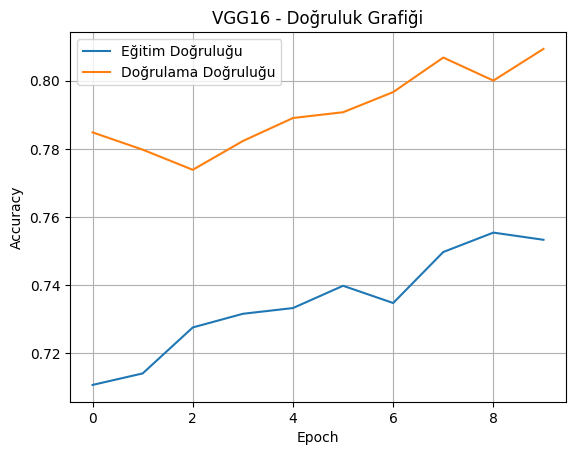

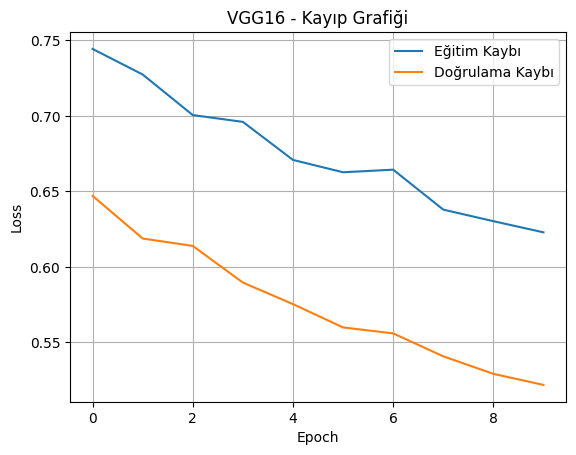

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('VGG16 - Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Kayıp
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('VGG16 - Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


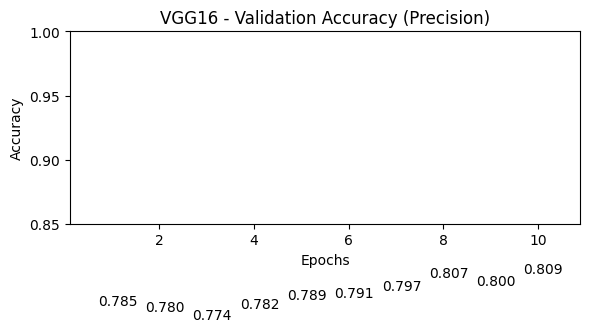

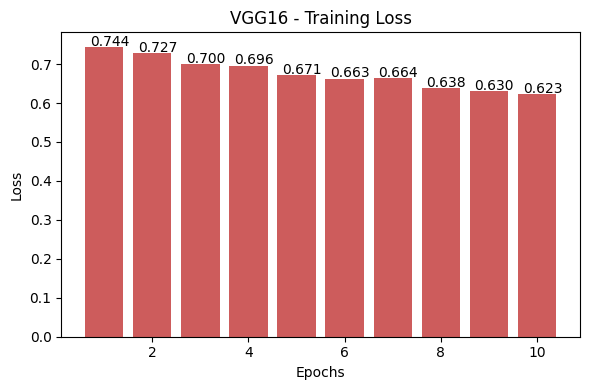

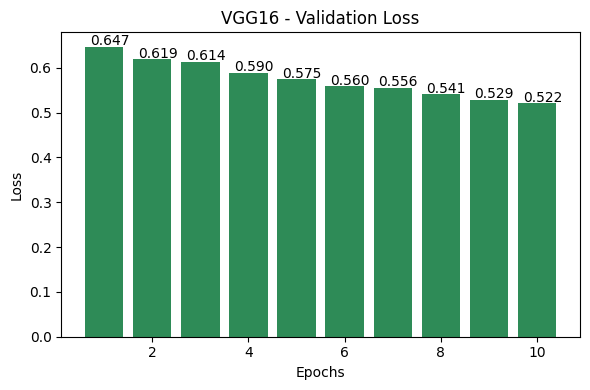

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history.history['accuracy']) + 1)
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Validation Accuracy (Precision)
plt.figure(figsize=(6,4))
plt.bar(epochs, val_accuracy, color='royalblue')
plt.title('VGG16 - Validation Accuracy (Precision)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
for i, v in enumerate(val_accuracy):
    plt.text(epochs[i]-0.3, v+0.002, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Training Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, train_loss, color='indianred')
plt.title('VGG16 - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(train_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Validation Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, val_loss, color='seagreen')
plt.title('VGG16 - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(val_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

# Rapor
report = classification_report(y_true, y_pred, target_names=labels)
print(report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 23s 600ms/step
                 precision    recall  f1-score   support

Bacterialblight       0.73      0.84      0.78       316
          Blast       0.80      0.59      0.68       288
      Brownspot       0.76      0.81      0.78       320
         Tungro       0.97      1.00      0.98       261

       accuracy                           0.80      1185
      macro avg       0.81      0.81      0.81      1185
   weighted avg       0.81      0.80      0.80      1185



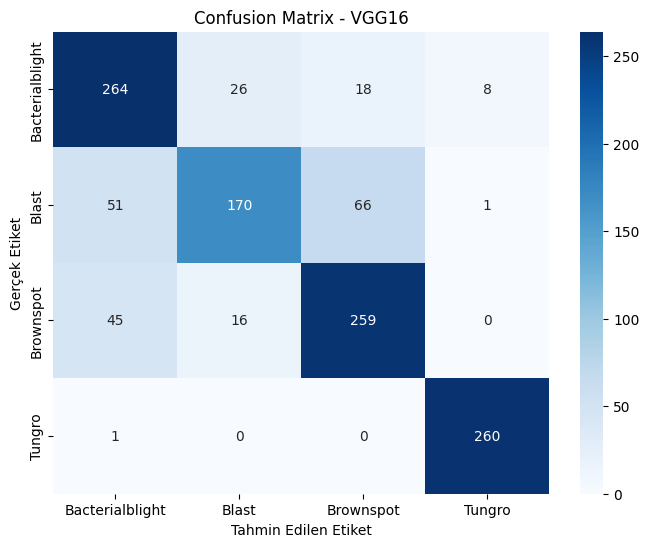

In [ ]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - VGG16')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('mobilenet_best_model.keras', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)
history_mobilenet = history


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 89s 551ms/step - accuracy: 0.7192 - loss: 0.7401 - val_accuracy: 0.9586 - val_loss: 0.1373
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 74s 494ms/step - accuracy: 0.9292 - loss: 0.2101 - val_accuracy: 0.9772 - val_loss: 0.0775
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 72s 481ms/step - accuracy: 0.9381 - loss: 0.1683 - val_accuracy: 0.9755 - val_loss: 0.0726
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 74s 496ms/step - accuracy: 0.9517 - loss: 0.1315 - val_accuracy: 0.9873 - val_loss: 0.0422
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 526ms/step - accuracy: 0.9578 - loss: 0.1183 - val_accuracy: 0.9924 - val_loss: 0.0334
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 535ms/step - accuracy: 0.9590 - loss: 0.1065 - val_accuracy: 0.9907 - val_loss: 0.0321
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 72s 485ms/step - accuracy: 0.9739 - loss: 0.0799 - val_accuracy: 0.9941 - val_loss: 0.0203
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 74s 496ms/step - accuracy: 0.9704 - loss: 0

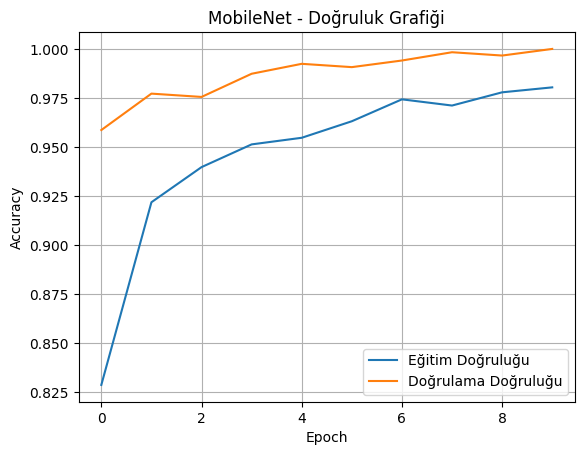

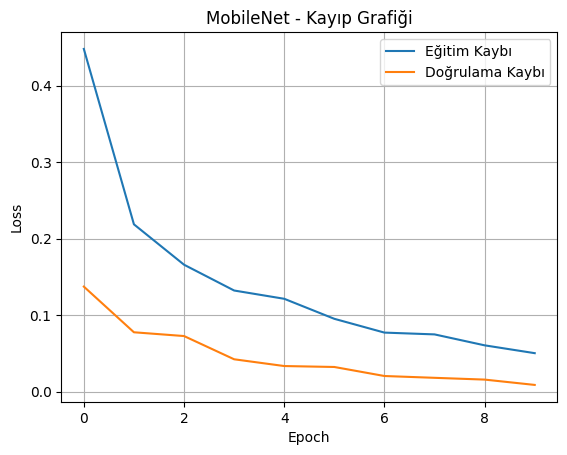

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk Grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('MobileNet - Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Kayıp Grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('MobileNet - Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


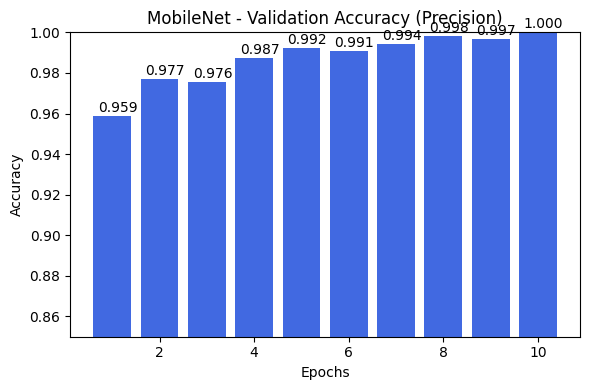

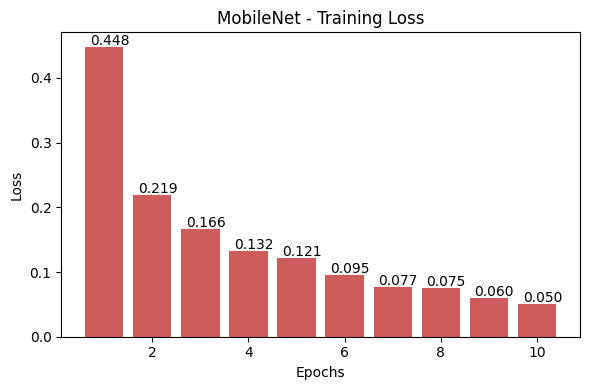

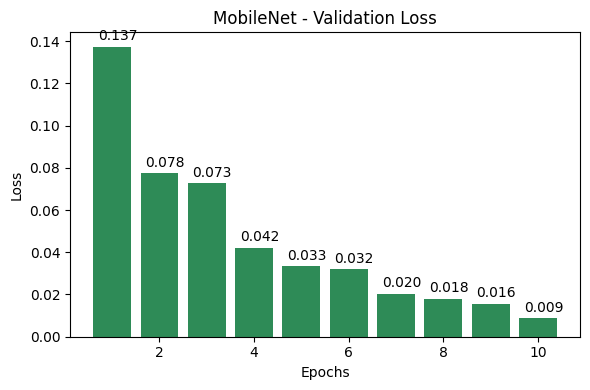

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history.history['accuracy']) + 1)
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Validation Accuracy (Precision)
plt.figure(figsize=(6,4))
plt.bar(epochs, val_accuracy, color='royalblue')
plt.title('MobileNet - Validation Accuracy (Precision)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
for i, v in enumerate(val_accuracy):
    plt.text(epochs[i]-0.3, v+0.002, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Training Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, train_loss, color='indianred')
plt.title('MobileNet - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(train_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Validation Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, val_loss, color='seagreen')
plt.title('MobileNet - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(val_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

# Sınıflandırma Raporu
report = classification_report(y_true, y_pred, target_names=labels)
print(report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 403ms/step
                 precision    recall  f1-score   support

Bacterialblight       0.99      1.00      1.00       316
          Blast       1.00      0.99      0.99       288
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       261

       accuracy                           1.00      1185
      macro avg       1.00      1.00      1.00      1185
   weighted avg       1.00      1.00      1.00      1185



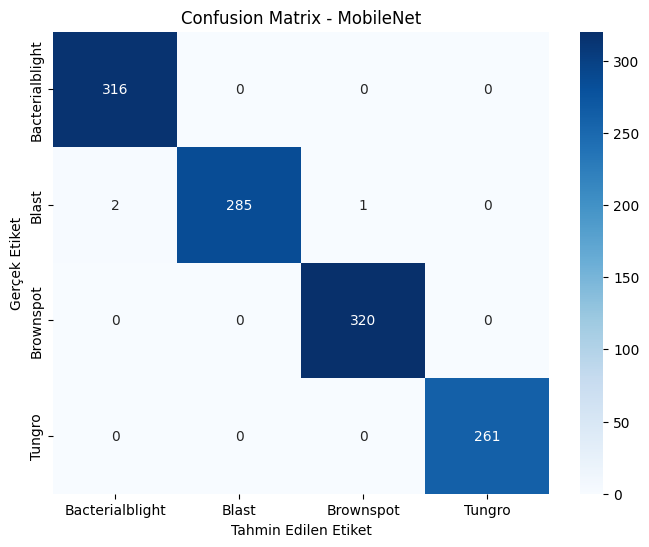

In [ ]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MobileNet')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Üst katmanlar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('densenet121_best_model.keras', save_best_only=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint]
)
history_densenet = history


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 140s 755ms/step - accuracy: 0.4441 - loss: 1.4429 - val_accuracy: 0.7941 - val_loss: 0.6318
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 524ms/step - accuracy: 0.7446 - loss: 0.6903 - val_accuracy: 0.8802 - val_loss: 0.3961
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 79s 530ms/step - accuracy: 0.8043 - loss: 0.4947 - val_accuracy: 0.9350 - val_loss: 0.2574
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 523ms/step - accuracy: 0.8555 - loss: 0.3919 - val_accuracy: 0.9401 - val_loss: 0.1968
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 78s 524ms/step - accuracy: 0.8670 - loss: 0.3469 - val_accuracy: 0.9544 - val_loss: 0.1513
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 77s 515ms/step - accuracy: 0.8794 - loss: 0.3235 - val_accuracy: 0.9553 - val_loss: 0.1300
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 535ms/step - accuracy: 0.8905 - loss: 0.2803 - val_accuracy: 0.9662 - val_loss: 0.1178
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 80s 536ms/step - accuracy: 0.8983 - loss: 

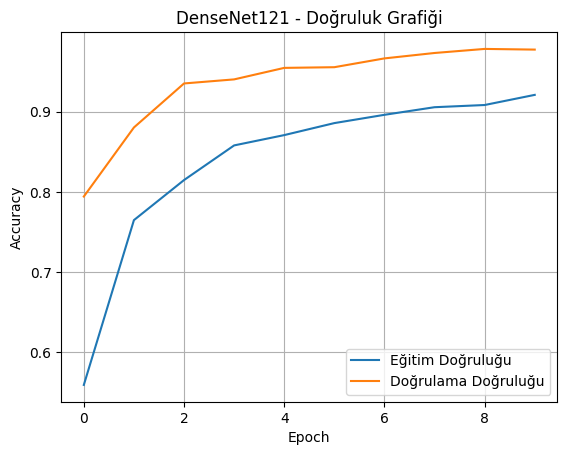

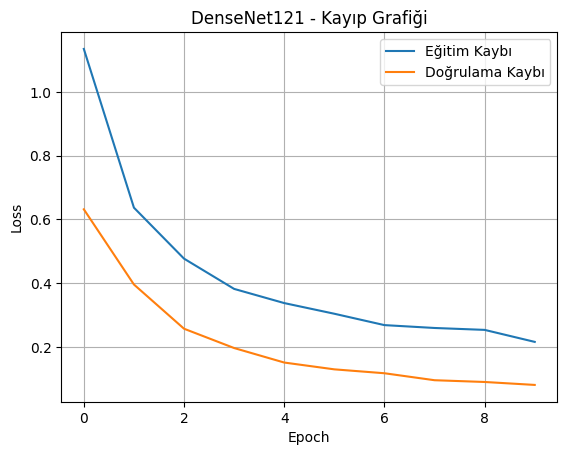

In [ ]:
import matplotlib.pyplot as plt

# Doğruluk
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('DenseNet121 - Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Kayıp
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('DenseNet121 - Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


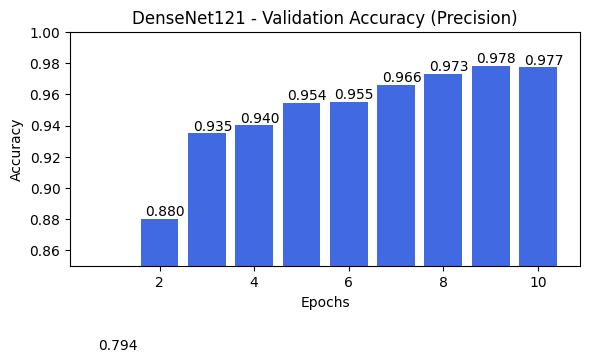

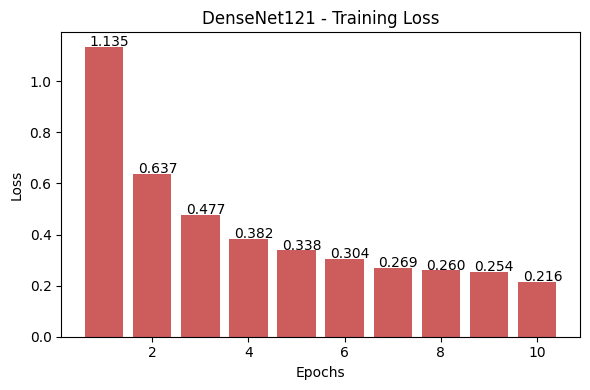

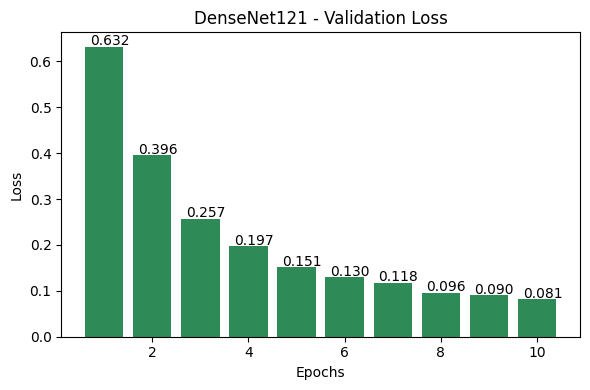

In [ ]:
import matplotlib.pyplot as plt


epochs = range(1, len(history.history['accuracy']) + 1)
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Validation Accuracy (Precision)
plt.figure(figsize=(6,4))
plt.bar(epochs, val_accuracy, color='royalblue')
plt.title('DenseNet121 - Validation Accuracy (Precision)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
for i, v in enumerate(val_accuracy):
    plt.text(epochs[i]-0.3, v+0.002, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Training Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, train_loss, color='indianred')
plt.title('DenseNet121 - Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(train_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()

# Validation Loss
plt.figure(figsize=(6,4))
plt.bar(epochs, val_loss, color='seagreen')
plt.title('DenseNet121 - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
for i, v in enumerate(val_loss):
    plt.text(epochs[i]-0.3, v+0.003, f"{v:.3f}")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = val_generator.classes
labels = list(val_generator.class_indices.keys())

# Sınıflandırma raporu
report = classification_report(y_true, y_pred, target_names=labels)
print(report)


38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 645ms/step
                 precision    recall  f1-score   support

Bacterialblight       0.96      0.99      0.98       316
          Blast       0.98      0.92      0.95       288
      Brownspot       0.96      0.97      0.97       320
         Tungro       0.99      1.00      1.00       261

       accuracy                           0.97      1185
      macro avg       0.97      0.97      0.97      1185
   weighted avg       0.97      0.97      0.97      1185



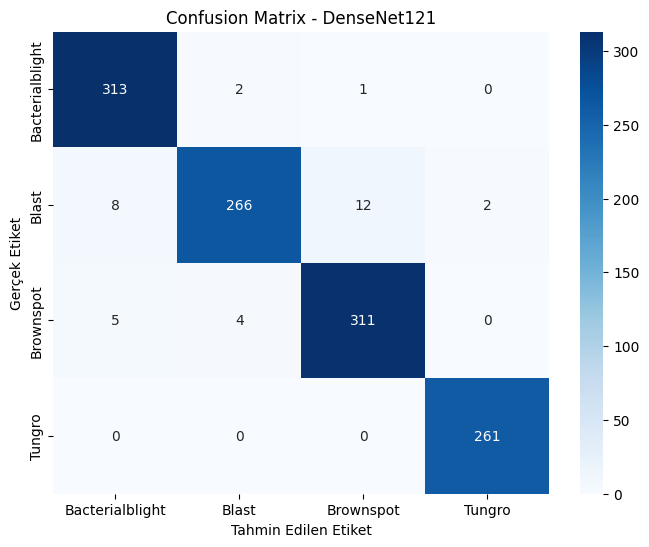

In [ ]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(8,6))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DenseNet121')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

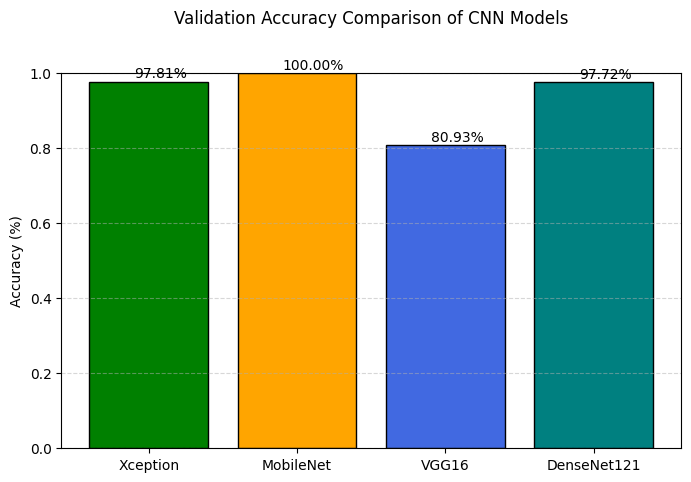

In [ ]:
import matplotlib.pyplot as plt

model_histories = {
    "Xception": history_xception,
    "MobileNet": history_mobilenet,
    "VGG16": history_vgg,
    "DenseNet121": history_densenet
}

model_names = []
accuracies = []

for model_name, hist in model_histories.items():
    acc = hist.history['val_accuracy'][-1]
    model_names.append(model_name)
    accuracies.append(acc)

colors = ['green', 'orange', 'royalblue', 'teal']
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black')

for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0 - 0.1, height + 0.01, f"{acc*100:.2f}%", fontsize=10)

plt.ylim(0, 1.0)
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Comparison of CNN Models\n\n')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.subplots_adjust(bottom=0.15, top=0.9)
plt.show()
